# Summary and test of changes in the PR: `General ncdm changes`

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
font = {'size'   : 22}
matplotlib.rc("font", **font)
matplotlib.rc(["text.usetex", True])

### Internal changes to NCDM handling: Sanity check that correct results are still produced

In [9]:
cosmo = {}
Omega_ncdm = 0.0001
k_output = 0.2
neutrino_masses = {1e-3: '1 meV',
                   1e-0: '1 eV',
                   1e+3: '1 keV',
                   1e+6: '1 MeV'}
basic_input = {
    'YHe':0.24,
    'k_output_values': k_output,
    'output':'tCl,mPk',
    'background_method':0}
for mass in neutrino_masses:
    ncdm_input = {
        'N_ncdm'    : 1,
        'Omega_ncdm': Omega_ncdm,
        'm_ncdm'    : mass,
    }
    cosmo[mass] = Class(basic_input | ncdm_input)    

... or equivalently:

In [10]:
for mass in neutrino_masses:
    ncdm_input = {
        'N_ncdm_standard'    : 1,
        'Omega_ncdm_standard': Omega_ncdm,
        'm_ncdm_standard'    : mass,
    }
    cosmo[mass] = Class(basic_input | ncdm_input)  

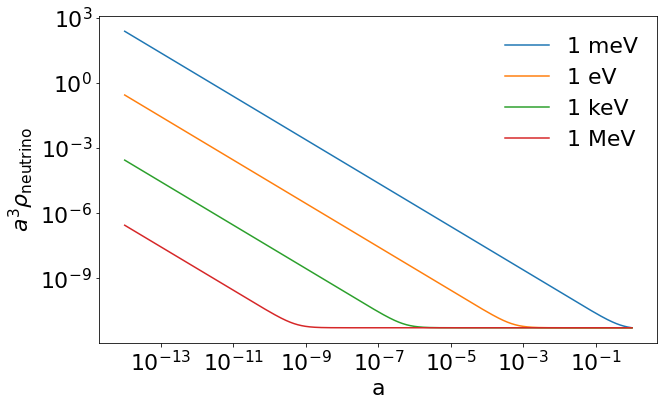

In [11]:
plt.figure(figsize=(10,6))
plt.xlabel('a'); plt.ylabel('$a^3 \\rho_{\\mathrm{neutrino}}$')
plt.xscale('log'); plt.yscale('log')
for mass, label in neutrino_masses.items():
    bg = cosmo[mass].get_background()
    alist = 1/(bg['z'] + 1)
    plt.plot(alist, alist**3*bg['(.)rho_ncdm[0]'], '-', label=label)
plt.legend(frameon=False, loc='upper right');

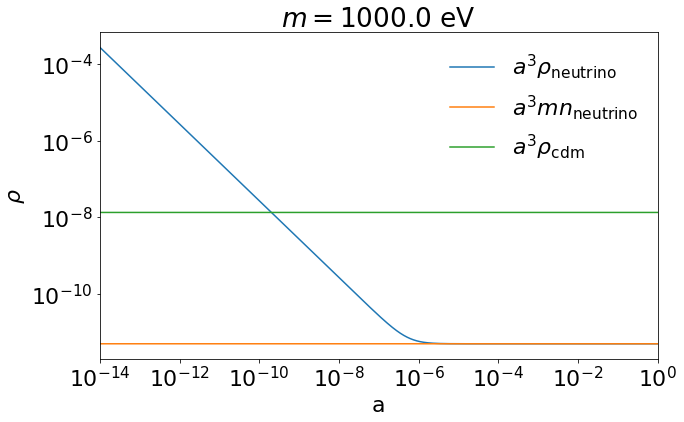

In [12]:
mass = 1e+3 # in eV
T_nu0 = 2.7254*0.71611 # Neutrino temperature in K
k_B = 1.38065e-23 # Boltzmann's constant
eV = 1.602e-19 # 1 eV in Joule
plt.figure(figsize=(10,6))
plt.title(fr'$m={mass}$ eV')
plt.xlabel('a'); plt.ylabel('$\\rho$')
plt.xlim([min(alist), max(alist)])
plt.xscale('log'); plt.yscale('log')
bg = cosmo[mass].get_background()
alist = 1/(bg['z'] + 1)
plt.plot(alist, alist**3*bg['(.)rho_ncdm[0]'], '-', label=r'$a^3 \rho_{\mathrm{neutrino}}$')
plt.plot(alist, alist**3*mass*eV/k_B/T_nu0*bg['(.)number_ncdm[0]'], '-', label=r'$a^3 mn_{\mathrm{neutrino}}$')
plt.plot(alist, alist**3*bg['(.)rho_cdm'], '-', label=r'$a^3 \rho_{\mathrm{cdm}}$')
# plt.plot(alist, alist**3*(bg['(.)rho_ur'] + bg['(.)rho_g']), '-', label=r'$a^3 (\rho_{\mathrm{ur}} + \rho_{\gamma})$')
plt.legend(frameon=False, loc='upper right');

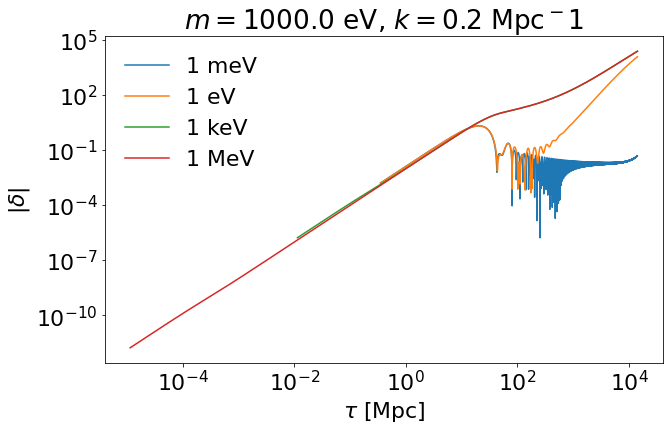

In [13]:
plt.figure(figsize=(10,6))
plt.title(fr'$m={mass}$ eV, $k={k_output}$ Mpc$^-1$')
plt.xlabel('$\\tau$ [Mpc]'); plt.ylabel('$|\\delta|$')
plt.xscale('log'); plt.yscale('log')
for mass, label in neutrino_masses.items():
    perts = cosmo[mass].get_perturbations()['scalar'][0]
    plt.plot(perts['tau [Mpc]'], np.abs(perts['delta_ncdm[0]']), '-', label=label)
plt.legend(frameon=False, loc='upper left');

### Internal changes to shooting algorithm

In [14]:
# Test runs for different parameters that require shooting
inputs = [{
        'Omega_dcdmdr':0.1,
        'Gamma_dcdm':1000.0
    },
    {
        'omega_dcdmdr':0.01,
        'Gamma_dcdm':0.1,
    },
    {
        'Omega_ini_dcdm':0.2
    },
    {
        'omega_ini_dcdm':0.1
    },
    {
        'sigma8':0.9
    },
    {
        '100*theta_s':1.04
    },
    {
        'h':0.70
    },
    {
        'H0':73.0
    },
    {
        'N_eff':3.046,
        'omega_b':0.02238280,
        'omega_cdm':0.1201075,
        '100*theta_s':1.042143,
        'N_ncdm':1,
        'm_ncdm':10,
        'background_method':0
    }
]
for inp in inputs:
    Class(basic_input | inp)
print("Class finished computations!")

Class finished computations!
